In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [4]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [5]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [6]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [7]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


## Weight and size of babies

In [8]:
weight <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 10:13) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))

headC <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 14:17) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))


head(weight)

id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [9]:
weightLong <- weight %>% gather(weekNames, weight, -id, -group, -sex)
headCLong <- headC %>% gather(weekNames, head, -id, -group, -sex)

weightLong %>% filter(id == 4)
headCLong %>% filter(id == 4)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,sex,weekNames,weight
4,teen,boy,BABYWeigth1g,3692.3
4,teen,boy,BABYWeigth2g,NA
4,teen,boy,BABYWeigth3g,NA
4,teen,boy,BABYWeigth4g,NA


id,group,sex,weekNames,head
4,teen,boy,HeadCircumcm1,37
4,teen,boy,HCcm2,NA
4,teen,boy,HCcm3,NA
4,teen,boy,HCcm4,NA


In [10]:
weightLong <- 
    weightLong %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

weightLong %>% filter(id == 1)

id,group,sex,weekNames,weight,week
1,teen,girl,BABYWeigth1g,3492.70,1
1,teen,girl,BABYWeigth2g,3592.50,2
1,teen,girl,BABYWeigth3g,5488.60,8
1,teen,girl,BABYWeigth4g,8282.74,16


In [11]:
headCLong <- 
    headCLong %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

headCLong %>% filter(id == 1)

id,group,sex,weekNames,head,week
1,teen,girl,HeadCircumcm1,34,1
1,teen,girl,HCcm2,37,2
1,teen,girl,HCcm3,39,8
1,teen,girl,HCcm4,42,16


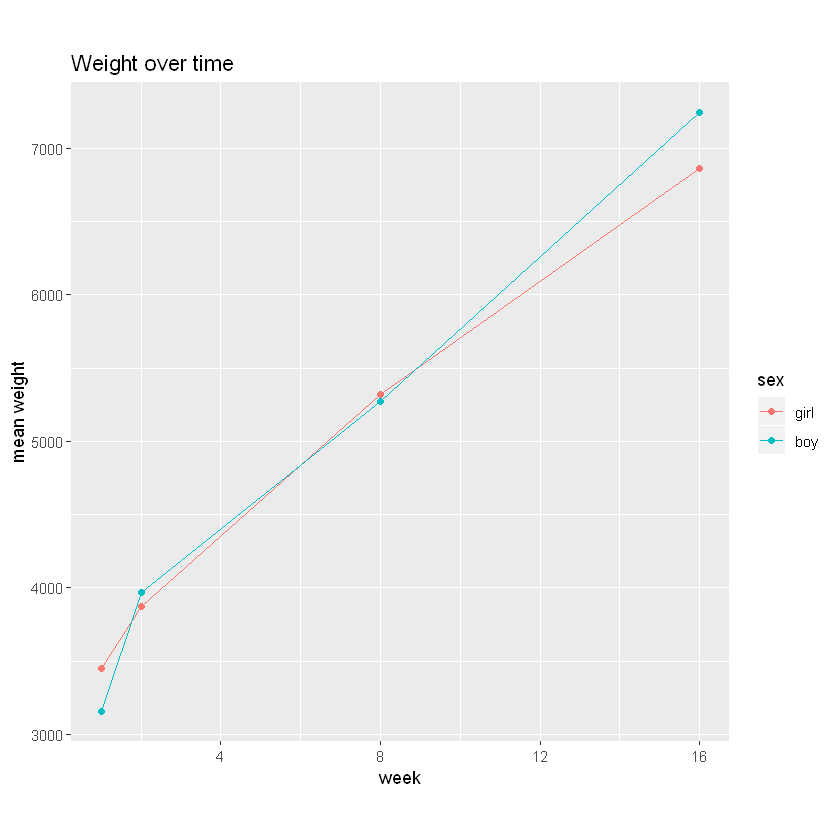

In [12]:
weightDist <- weightLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(weight, na.rm = T), sd = sd(weight, na.rm = T))

#png(filename="./plots/weight.png", units="cm", width=15, height=15, res = 300)
ggplot(weightDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_linerange(aes(ymin = mean - 2*sd, ymax = mean + 2*sd)) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Weight over time') + ylab('mean weight')
#dev.off()

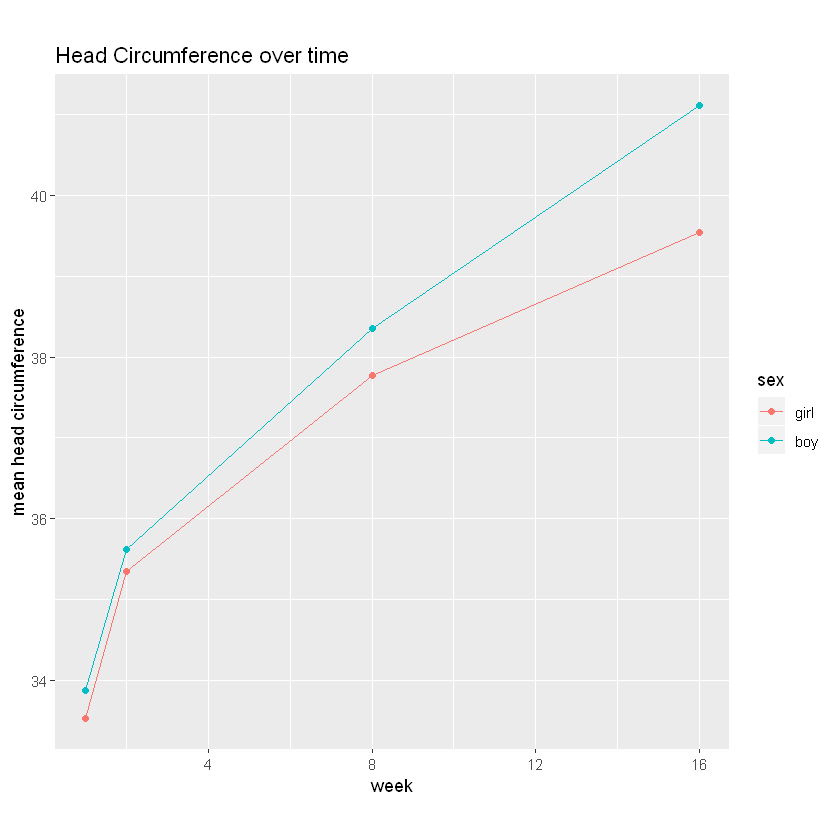

In [13]:
headCDist <- headCLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(head, na.rm = T), sd = sd(head, na.rm = T))

#png(filename="./plots/head_c.png", units="cm", width=15, height=15, res = 300)
ggplot(headCDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_errorbar(aes(ymin = mean - 2*sd, ymax = mean + 2*sd), alpha = 0.5) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Head Circumference over time') + ylab('mean head circumference')
#dev.off()

In [14]:
summary(lm(weightDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = weightDist)

Residuals:
      1       2       3       4       5       6       7       8 
-142.77   58.29  165.70  -81.21 -279.17  276.06   40.34  -37.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3365.70     174.91  19.243  4.3e-05 ***
week          223.54      19.40  11.520 0.000324 ***
sexboy       -185.37     247.35  -0.749 0.495267    
week:sexboy    32.75      27.44   1.194 0.298597    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.8 on 4 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9775 
F-statistic: 102.4 on 3 and 4 DF,  p-value: 0.0003084


In [15]:
summary(lm(headCDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = headCDist)

Residuals:
      1       2       3       4       5       6       7       8 
-0.9137  0.5435  0.7621 -0.3919 -0.7740  0.5162  0.5478 -0.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.07687    0.66572  51.188 8.72e-07 ***
week         0.36628    0.07385   4.959  0.00771 ** 
sexboy       0.12198    0.94147   0.130  0.90317    
week:sexboy  0.08387    0.10445   0.803  0.46700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 4 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.8955 
F-statistic: 20.99 on 3 and 4 DF,  p-value: 0.006556


In [16]:
weight %>% inner_join(headC, by = 'id') %>% select(contains('Weigth'), contains('cm')) %>% cor(use="complete.obs")

,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g,HeadCircumcm1,HCcm2,HCcm3,HCcm4
BABYWeigth1g,1.0000000,0.18492505,0.6236000,0.3964243,0.52235889,0.5382875,0.5883136,0.19971893
BABYWeigth2g,0.1849250,1.00000000,0.3589664,0.2509749,0.07017043,0.2817560,0.1265833,-0.08215091
BABYWeigth3g,0.6236000,0.35896645,1.0000000,0.7727088,0.78427813,0.8303841,0.8158937,0.54844962
BABYWeigth4g,0.3964243,0.25097489,0.7727088,1.0000000,0.66359782,0.6963510,0.7417554,0.68986933
HeadCircumcm1,0.5223589,0.07017043,0.7842781,0.6635978,1.00000000,0.8338292,0.8214121,0.75736063
HCcm2,0.5382875,0.28175596,0.8303841,0.6963510,0.83382922,1.0000000,0.7285378,0.64730848
HCcm3,0.5883136,0.12658332,0.8158937,0.7417554,0.82141209,0.7285378,1.0000000,0.74281294
HCcm4,0.1997189,-0.08215091,0.5484496,0.6898693,0.75736063,0.6473085,0.7428129,1.00000000


## Weight and size of babies = Week?

In [17]:
headCDist
cor(weightDist[2:3])
cor(headCDist[2:3])

sex,week,mean,sd
girl,1,33.52941,0.8744746
girl,2,35.35294,1.4116115
girl,8,37.76923,1.0919284
girl,16,39.54545,1.3684763
boy,1,33.87500,1.3619246
boy,2,35.61538,1.3587324
boy,8,38.34783,1.5553046
boy,16,41.11111,1.5676468


,week,mean
week,1.0000000,0.9911695
mean,0.9911695,1.0000000


,week,mean
week,1.0000000,0.9552353
mean,0.9552353,1.0000000


## Group and Free AA levels

In [18]:
AA_E %>% select(sex, group) %>% filter(!is.na(sex)) %>%
    group_by(sex, group) %>% summarise(number = n()) %>%
    spread(group, number)

sex,teen,adult
girl,13,13
boy,24,11


In [19]:
table = table( AA_E %>% select(sex, group)) 
print(table)

      group
sex    teen adult
  girl   13    13
  boy    24    11


Teen mothers have almost twice the number of boys: 24 boys and 13 girls. Is there an assosiation between group and sex? 


$H_0:$ group and sex are independent.

In [20]:
print(chisq.test(table))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 1.448, df = 1, p-value = 0.2288



$P(independence) \approx 0.23$ 

### The model: 

$  AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ group + \alpha_{id}$

In [21]:
meGroup <- function(df){
    
    me <- lmer(level ~ sex + group + week + (1 | id), data = df)
    
    return(me)
}

In [22]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [23]:
nAA_E <- dim(AA_E_Nested)[1]
nAA_NE <- dim(AA_NE_Nested)[1]

In [24]:
me_E_G <- list()
tidy_E_G <- list()

for(i in 1:nAA_E){
    
    me_E_G[[i]] <- meGroup(AA_E_Nested$data[[i]])
    tidy_E_G[[i]] <- tidy(me_E_G[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [25]:
me_NE_G <- list()
tidy_NE_G <- list()

for(i in 1:nAA_NE){
    
    me_NE_G[[i]] <- meGroup(AA_NE_Nested$data[[i]])
    tidy_NE_G[[i]] <- tidy(me_NE_G[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [26]:
me_E_G[1]
tidy_E_G[1]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + group + week + (1 | id)
   Data: df
REML criterion at convergence: 485.7638
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2849  
 Residual             0.8451  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy   groupadult         week  
    1.69466      0.19741      0.07302      0.01516  


term,estimate,std.error,statistic,AA
(Intercept),1.69465972,0.15172437,11.1693307,HIS
sexboy,0.19741206,0.15314414,1.2890605,HIS
groupadult,0.07302050,0.15447799,0.4726919,HIS
week,0.01515671,0.01095015,1.3841560,HIS


In [27]:
sexCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("sexboy", term))
sexCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("sexboy", term))

groupCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("groupadult", term))
groupCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("groupadult", term))

sexCoef_NE_G
groupCoef_E_G

term,estimate,std.error,statistic,AA
sexboy,0.13119286,0.1580725,0.8299535,ARG
sexboy,0.47781369,0.4972377,0.9609363,ASP
sexboy,1.82605942,1.7129060,1.0660594,ALA
sexboy,-0.04476726,0.1290421,-0.3469199,ASN
sexboy,0.32271226,0.1688611,1.9111112,CYS
sexboy,1.80891292,0.8199613,2.2060955,GLY
sexboy,13.19308351,6.7666051,1.9497345,GLU
sexboy,4.85963020,3.3327430,1.4581473,GLN
sexboy,0.34748015,0.3551629,0.9783683,PRO
sexboy,1.48581776,0.7025900,2.1147721,SER


term,estimate,std.error,statistic,AA
groupadult,0.073020496,0.15447799,0.4726919,HIS
groupadult,-0.083155492,0.10912814,-0.7619986,ILE
groupadult,0.074785724,0.20732122,0.3607239,LEU
groupadult,0.084027004,0.22950020,0.3661304,LYS
groupadult,0.029426189,0.05794487,0.5078308,MET
groupadult,0.028960713,0.08380161,0.3455866,PHE
groupadult,0.917370138,0.62730367,1.4624020,THR
groupadult,0.003820134,0.01636325,0.2334581,TRP
groupadult,0.060417454,0.26093030,0.2315463,VAL


In [28]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [29]:
me_E_S <- list()
tidy_E_S <- list()

for(i in 1:nAA_E){
    
    me_E_S[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [30]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    me_NE_S[[i]] <- meSex(AA_NE_Nested$data[[i]])
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [31]:
sexCoef_E_S <- bind_rows(tidy_E_S) %>% filter(grepl("sexboy", term))
sexCoef_NE_S <- bind_rows(tidy_NE_S) %>% filter(grepl("sexboy", term))

sexCoef_E_S$term <- rep('sexboy (w/o group)', nAA_E)
sexCoef_NE_S$term <- rep('sexboy (w/o group)', nAA_NE)

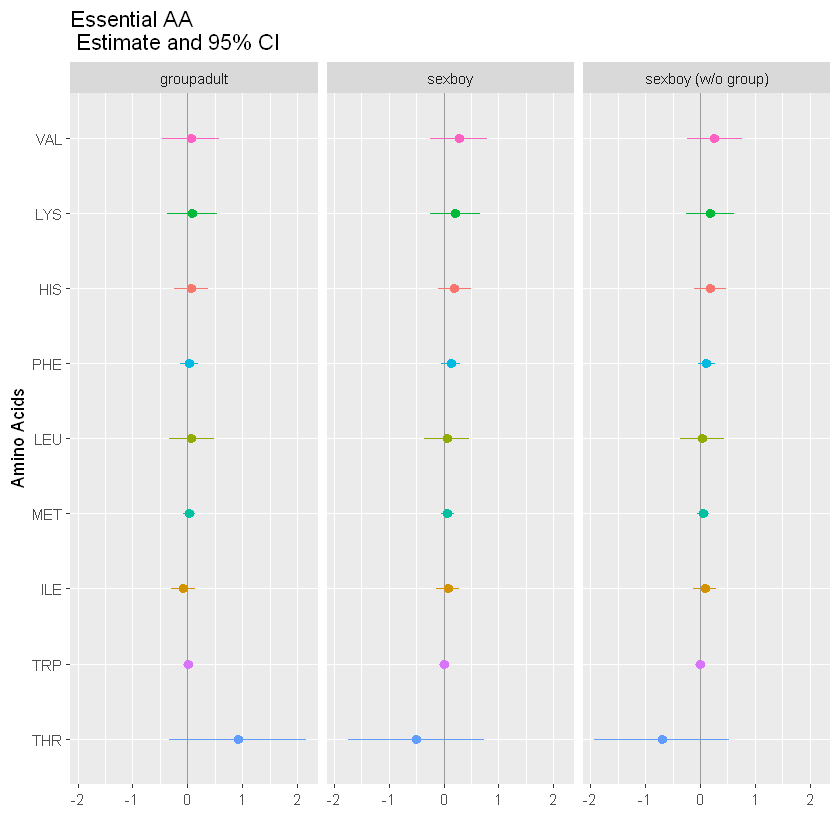

In [32]:
group_E <- rbind(sexCoef_E_G, groupCoef_E_G, sexCoef_E_S)

#png(filename="./plots/group_E.png", units="cm", width=20, height=20, res = 300)
ggplot(group_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

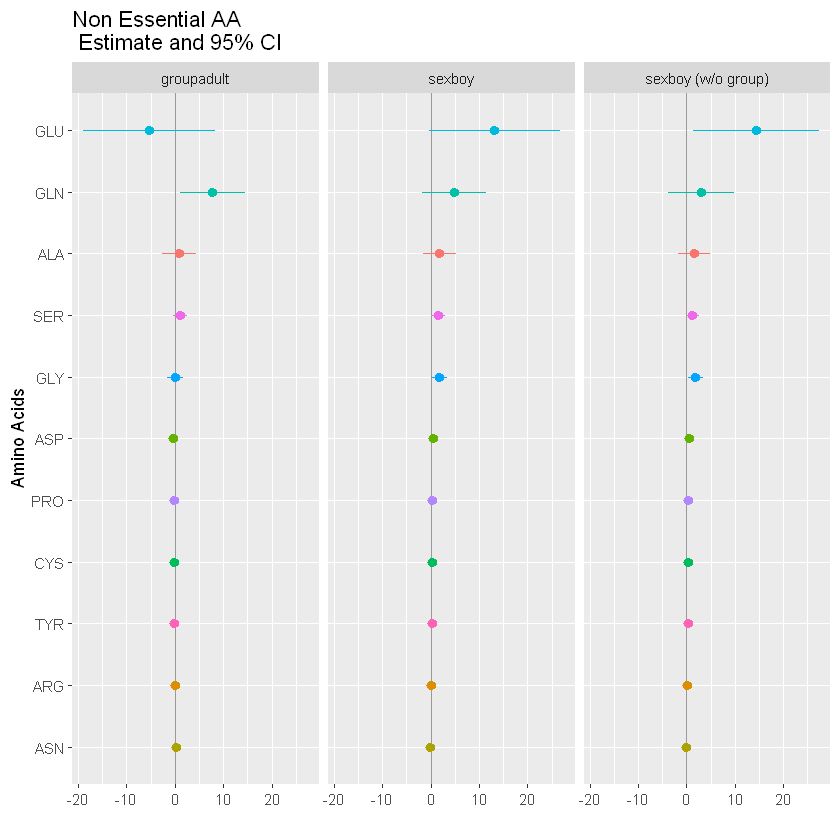

In [33]:
group_NE <- rbind(sexCoef_NE_G, groupCoef_NE_G, sexCoef_NE_S)

#png(filename="./plots/group_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(group_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

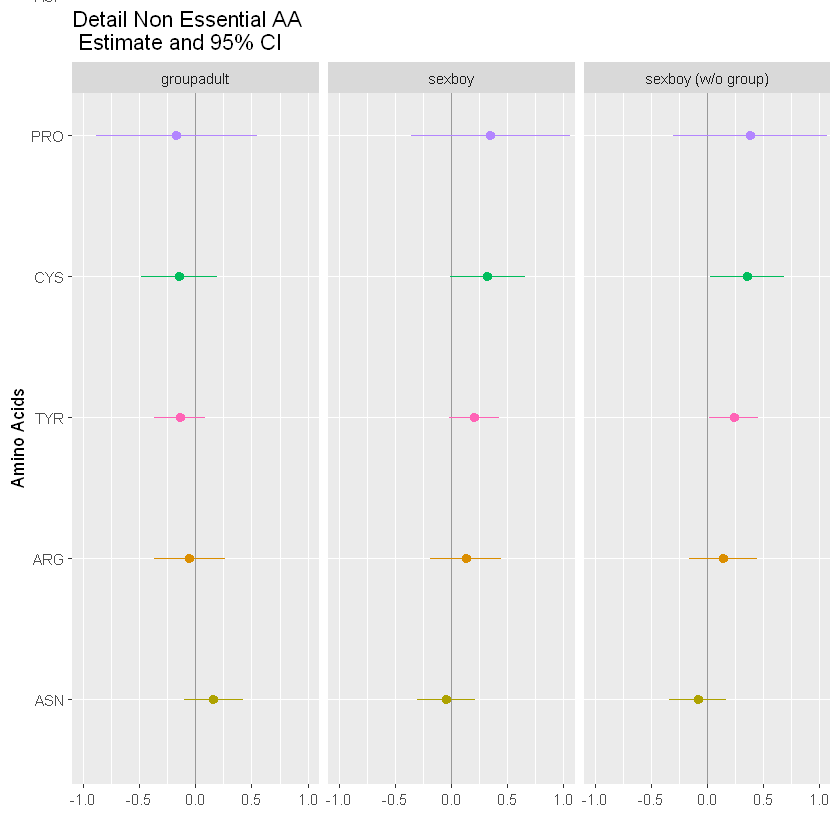

In [34]:
#png(filename="./plots/group_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(group_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-1, 1), xlim = c(1, 4.7)) + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Detail Non Essential AA \n Estimate and 95% CI') 
#dev.off()

# Fastest Growing Babies

Here only ids with all 4 measurements are used. 

In [35]:
percentil <- function(x, p){
    n <- length(x)
    xs <- sort(x)
    
    k <- ceiling(p*n)
    
    return(list(percentil = k, value = xs[k]))
}

In [36]:
x <- c(2, 4, 5, 10)

percentil(x, 0.75)


$percentil
[1] 3

$value
[1] 5

In [37]:
head(headC)
head(weight)

id,group,sex,HeadCircumcm1,HCcm2,HCcm3,HCcm4
1,teen,girl,34,37,39,42
2,teen,boy,35,37,38,41
3,teen,boy,35,37,NA,NA
4,teen,boy,37,NA,NA,NA
5,teen,NA,34,NA,NA,NA
6,teen,boy,35,36,39,44


id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [38]:
headC_NO_NA <- headC %>% na.omit()
weight_NO_NA <- weight %>% na.omit()

headCLong_NO_NA <- headC_NO_NA %>% gather(weekNames, head, -id, -group, -sex)
weightLong_NO_NA <- weight_NO_NA %>% gather(weekNames, weight, -id, -group, -sex)

In [39]:
headCLong_NO_NA <- 
    headCLong_NO_NA %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

In [40]:
weightLong_NO_NA <- 
    weightLong_NO_NA %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

In [306]:
head(headCLong_NO_NA)
headCLong_NO_NA %>% group_by(sex) %>% summarise(n())

id,group,sex,weekNames,head,week
1,teen,girl,HeadCircumcm1,34,1
2,teen,boy,HeadCircumcm1,35,1
6,teen,boy,HeadCircumcm1,35,1
7,teen,boy,HeadCircumcm1,34,1
8,teen,boy,HeadCircumcm1,34,1
20,teen,boy,HeadCircumcm1,33,1


sex,n()
girl,24
boy,60


In [305]:
head(weightLong_NO_NA)
weightLong_NO_NA %>% group_by(sex) %>% summarise(n())

id,group,sex,weekNames,weight,week
1,teen,girl,BABYWeigth1g,3492.7,1
2,teen,boy,BABYWeigth1g,3392.9,1
6,teen,boy,BABYWeigth1g,3093.5,1
7,teen,boy,BABYWeigth1g,2993.7,1
8,teen,boy,BABYWeigth1g,3392.9,1
14,teen,girl,BABYWeigth1g,2164.0,1


sex,n()
girl,28
boy,56


In [43]:
dim(headCLong_NO_NA)
dim(weightLong_NO_NA)

[1] 84  6

[1] 84  6

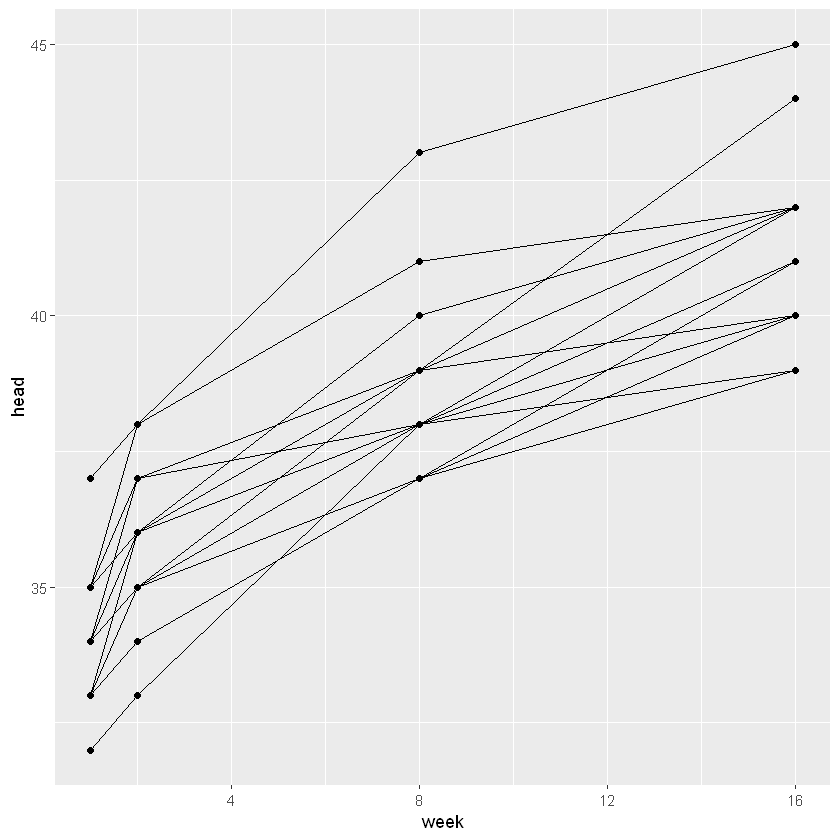

In [110]:
ggplot(headCLong_NO_NA, aes(x = week, y = head, group = id)) + 
    #geom_smooth(method = lm, se = F) +        
    geom_point() + geom_line() 
    

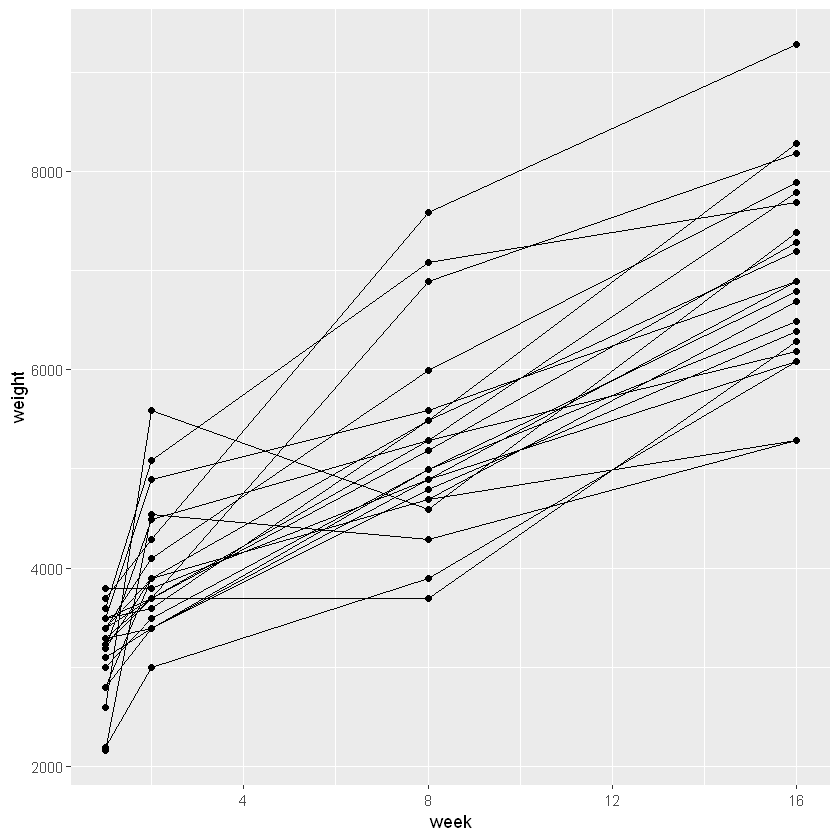

In [45]:
ggplot(weightLong_NO_NA, aes(x = week, y = weight, group = id)) + geom_point() + geom_line()

In [46]:
head_id <- lmer(head ~ week + (1 + week| id), data = headCLong_NO_NA)
weight_id <- lmer(weight ~ week + (1 + week| id), data = weightLong_NO_NA)

In [47]:
fixef(head_id)
ranef(head_id)

(Intercept)        week 
 34.1888083   0.4411642

$id
   (Intercept)          week
1   0.59199045  0.0164747724
2   0.35188290  0.0097927097
6   1.01109202  0.0281381413
7  -0.14028256 -0.0039039873
8   0.43744185  0.0121737689
20 -0.43715705 -0.0121658431
23 -1.14091041 -0.0317509164
30  0.76691023  0.0213426948
32 -0.46975094 -0.0130729132
35 -0.52679024 -0.0146602860
36 -0.86033286 -0.0239425957
37 -0.86033286 -0.0239425957
41 -0.04657513 -0.0012961606
48  2.54870192  0.0709289888
52 -0.43715705 -0.0121658431
54 -0.01425361 -0.0003966702
55 -0.80329356 -0.0223552229
57 -0.31927657 -0.0088852935
59  1.25500145  0.0349260080
62 -0.64874495 -0.0180542194
64 -0.25816303 -0.0071845369


In [48]:
fixef(weight_id)
ranef(weight_id)

(Intercept)        week 
   3237.692     237.473

$id
   (Intercept)       week
1    168.09469  36.040552
2    172.82537  37.054840
6    -64.77830 -13.888874
7    -99.47227 -21.327476
8     95.45774  20.466736
14  -278.16406 -59.640114
20  -270.51032 -57.999105
23  -199.40797 -42.754317
30   261.65164  56.099749
32    47.45208  10.174024
35    59.97693  12.859428
36   -68.77412 -14.745601
37  -240.57580 -51.580957
41  -119.77760 -25.681068
48   469.97579 100.765750
52    44.24791   9.487028
53    24.14464   5.176762
54  -116.55183 -24.989441
55   -88.84882 -19.049743
59   272.92228  58.516244
62   -69.88798 -14.984419


In [94]:
head_week_p1 <- percentil(ranef(head_id)$id$week, 1/3)$value
head_week_p2 <- percentil(ranef(head_id)$id$week, 2/3)$value

head_start_p1 <- percentil(ranef(head_id)$id$`(Intercept)`, 1/3)$value
head_start_p2 <- percentil(ranef(head_id)$id$`(Intercept)`, 2/3)$value

In [296]:
weight_week_p1 <- percentil(ranef(weight_id)$id$week, 1/3)$value
weight_week_p2 <- percentil(ranef(weight_id)$id$week, 2/3)$value

weight_start_p1 <- percentil(ranef(weight_id)$id$`(Intercept)`, 1/3)$value
weight_start_p2 <- percentil(ranef(weight_id)$id$`(Intercept)`, 2/3)$value

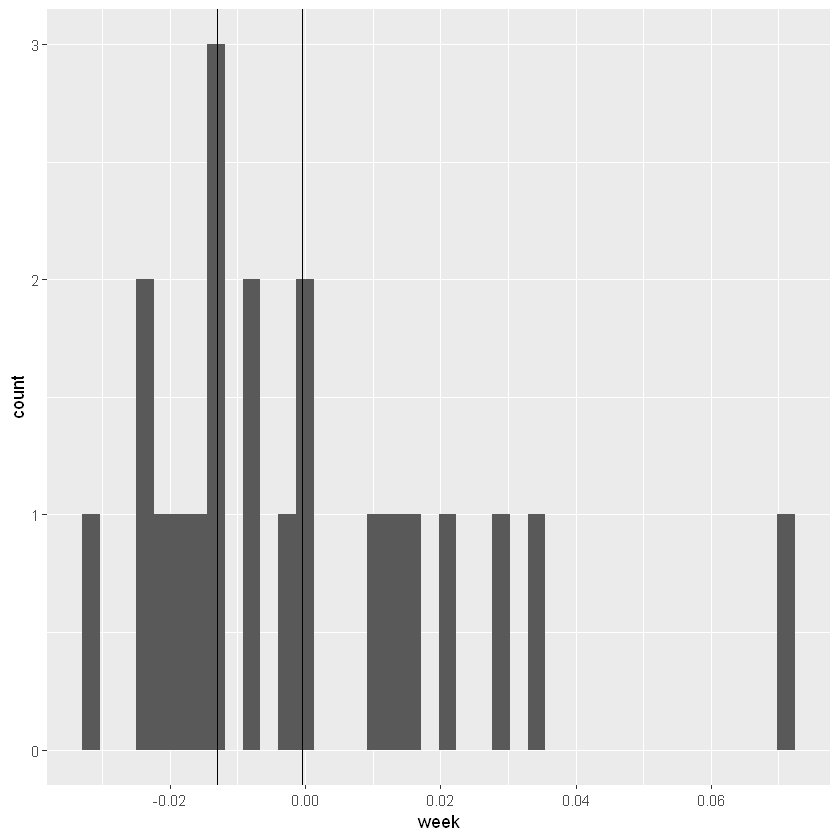

In [301]:
ggplot(ranef(head_id)$id, aes(x = week)) + geom_histogram(bins = 40) +
    geom_vline(xintercept = head_week_p1) + 
    geom_vline(xintercept = head_week_p2) 

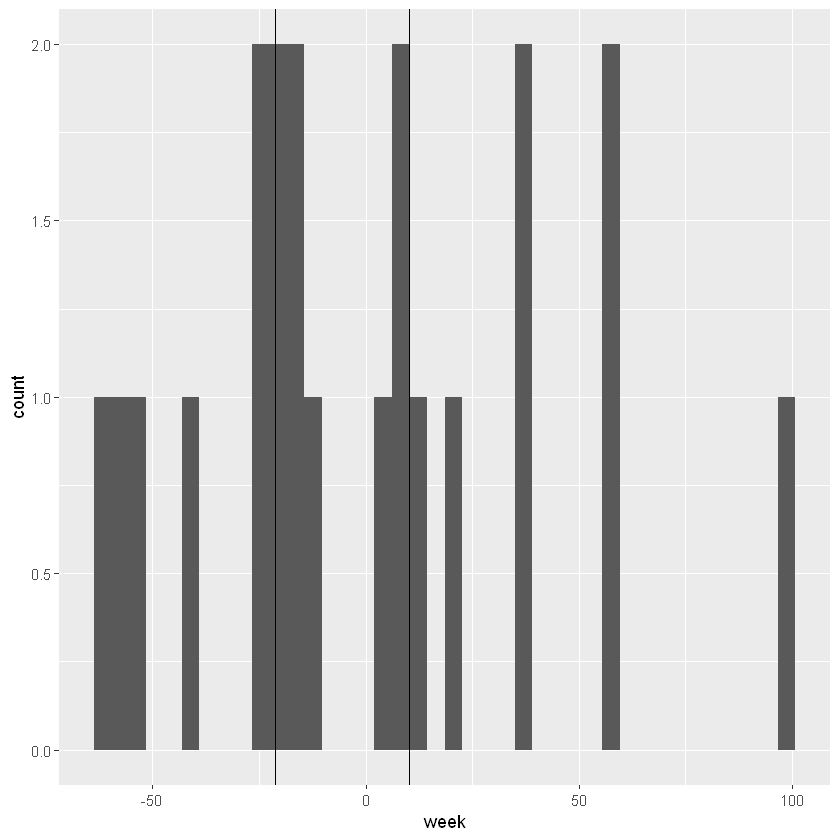

In [304]:
ggplot(ranef(weight_id)$id, aes(x = week)) + geom_histogram(bins = 40) +
    geom_vline(xintercept = weight_week_p1) + 
    geom_vline(xintercept = weight_week_p2) 

In [331]:
hc_growth <- 
    ranef(head_id)$id %>% mutate(id = headC_NO_NA$id, 
                             hc_speed = ifelse(week < head_week_p1, 'slow',
                                   ifelse(week < head_week_p2, 'moderate', 'fast'))) %>%
                      mutate(first_hc = ifelse(`(Intercept)` < head_start_p1, 'small', 
                                              ifelse(`(Intercept)` < head_start_p2, 'normal', 'big')))

hc_growth %>% filter(hc_speed != 'moderate') %>% summarise(n())

n()
14


In [330]:
weight_growth <- 
    ranef(weight_id)$id %>% mutate(id = weight_NO_NA$id,
                             weight_speed = ifelse(week < weight_week_p1, 'slow',
                                   ifelse(week < weight_week_p2, 'moderate', 'fast'))) %>%
                      mutate(first_weight = ifelse(`(Intercept)` < weight_start_p1, 'small', 
                                              ifelse(`(Intercept)` < weight_start_p2, 'normal', 'big')))

weight_growth %>% filter(weight_speed != 'moderate') %>% summarise(n())

n()
14


## AA concentration for fast growing babies

In [332]:
meSpeed <- function(df){
    
    me <- lmer(level ~ sex + week + speed + (1| id), data = df)
    
    return(me)
}

In [333]:
me_E_S <- list()
tidy_E_S <- list()

nAA_E_wo_TRP <- 1:nAA_E
for(i in nAA_E_wo_TRP[-8]){

    df <- AA_E_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>% 
        filter(speed != 'moderate')
    
    me_E_S[[i]] <- meSpeed(df)
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [334]:
# TRP data is unsufficient. Almost all meas. are 0.
j <- 8
#df <- AA_E_Nested$data[[j]] %>% filter(id %in% headC_NO_NA$id)
#mod <- meWeek(df)

#tidy(mod, effects = 'fixed')
head(AA_E_Nested$data[[j]])

id,group,age,sex,weekNames,level,week
1,teen,17,girl,TRPCalostrum,0,1
2,teen,16,boy,TRPCalostrum,0,1
3,teen,17,boy,TRPCalostrum,0,1
4,teen,16,boy,TRPCalostrum,0,1
5,teen,16,NA,TRPCalostrum,0,1
6,teen,16,boy,TRPCalostrum,0,1


In [335]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    df <- AA_NE_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(speed != 'moderate')
    
    me_NE_S[[i]] <- meSpeed(df)
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [336]:
speed_E <- bind_rows(tidy_E_S) %>% filter(grepl("speed", term)) 
speed_NE <- bind_rows(tidy_NE_S) %>% filter(grepl("speed", term)) 

speed_E
speed_NE

term,estimate,std.error,statistic,AA
speedslow,0.03923469,0.2860682,0.1371515,HIS
speedslow,-0.25513682,0.1539448,-1.6573263,ILE
speedslow,-0.18431814,0.4549519,-0.4051377,LEU
speedslow,-0.36268885,0.3822198,-0.9489013,LYS
speedslow,-0.10445143,0.1164600,-0.8968870,MET
speedslow,-0.07999466,0.1866290,-0.4286294,PHE
speedslow,-1.73629808,1.0729166,-1.6182973,THR
speedslow,-0.62784273,0.5893943,-1.0652338,VAL


term,estimate,std.error,statistic,AA
speedslow,-0.321482992,0.2785112,-1.15429117,ARG
speedslow,0.259016878,0.9358773,0.27676373,ASP
speedslow,-2.152256715,3.4407640,-0.62551710,ALA
speedslow,0.006730534,0.1848849,0.03640392,ASN
speedslow,0.381998287,0.3379170,1.13045003,CYS
speedslow,-0.833478246,1.8836167,-0.44248825,GLY
speedslow,-2.578198956,13.1509695,-0.19604630,GLU
speedslow,1.707580588,6.0473231,0.28236966,GLN
speedslow,-0.577353724,0.5530978,-1.04385463,PRO
speedslow,-0.642776178,1.7270996,-0.37217089,SER


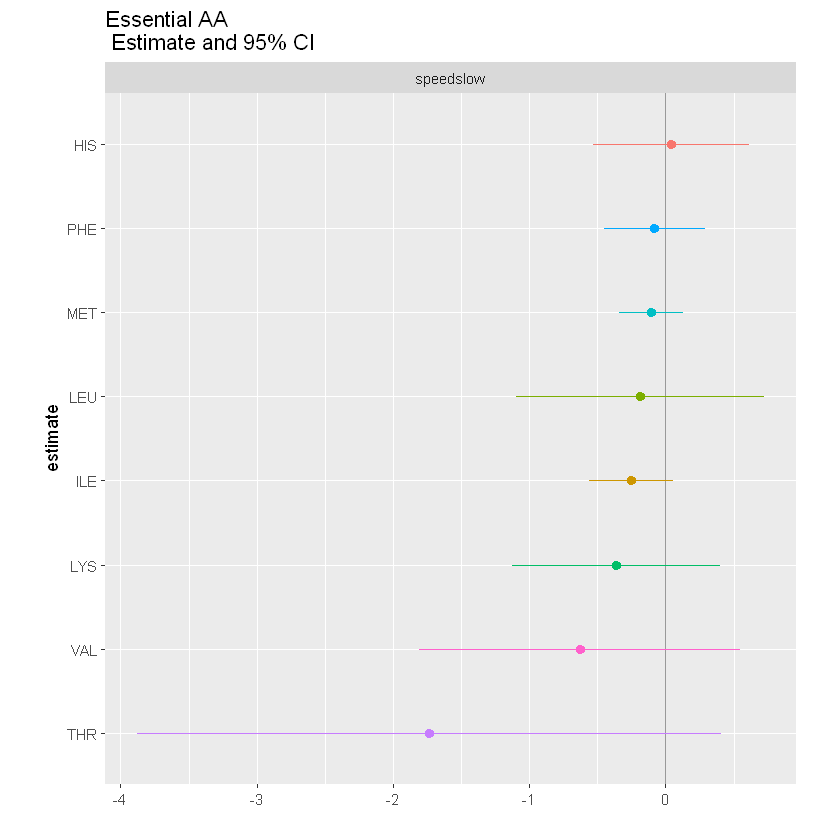

In [354]:
#png(filename="./plots/EAA_speed_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(speed_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab('') + xlab('estimate')
#dev.off()

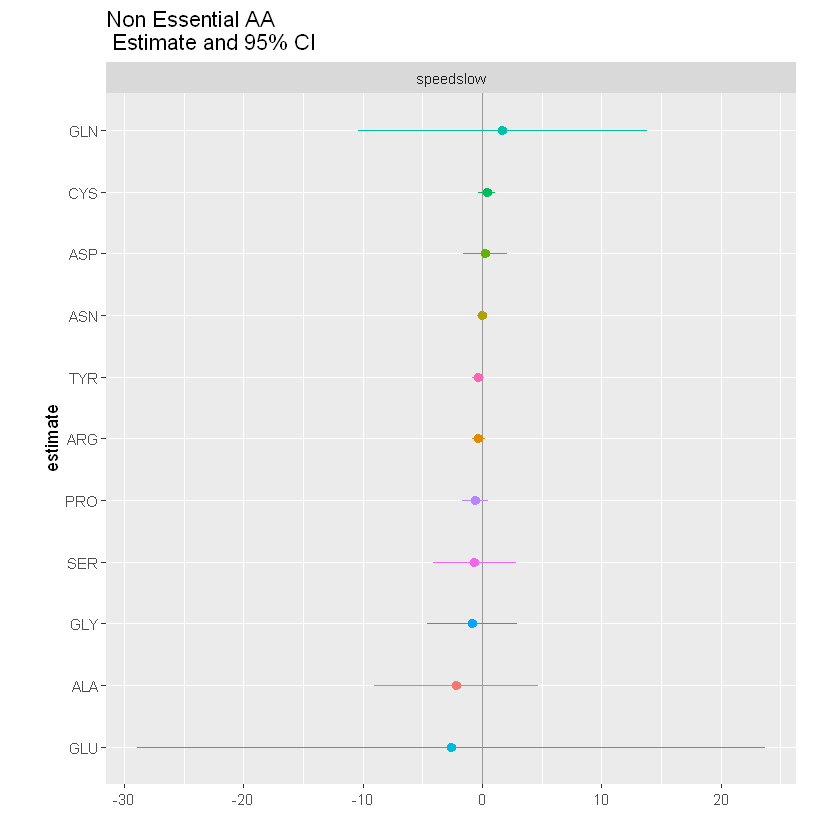

In [352]:
#png(filename="./plots/NEAA_speed_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(speed_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab('') + xlab('estimate')
#dev.off()

In [319]:
meStart <- function(df){
    
    me <- lmer(level ~ week + start + (1| id), data = df)
    
    return(me)
}

In [339]:
me_E_Start <- list()
tidy_E_Start <- list()

nAA_E_wo_TRP <- 1:nAA_E
for(i in nAA_E_wo_TRP[-8]){

    df <- AA_E_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(start != 'normal')
    
    me_E_Start[[i]] <- meStart(df)
    tidy_E_Start[[i]] <- tidy(me_E_Start[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [340]:
me_NE_Start <- list()
tidy_NE_Start <- list()

for(i in 1:nAA_NE){
    
    df <- AA_NE_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(start != 'normal')
    
    me_NE_Start[[i]] <- meStart(df)
    tidy_NE_Start[[i]] <- tidy(me_NE_Start[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [341]:
tidy_E_Start[[1]]

term,estimate,std.error,statistic,AA
(Intercept),2.011777490,0.2159049,9.31788755,HIS
week,0.000224284,0.0172505,0.01300159,HIS
startsmall,0.018612686,0.2852156,0.06525830,HIS


In [342]:
start_E <- bind_rows(tidy_E_Start) %>% filter(grepl("start", term)) 
start_NE <- bind_rows(tidy_NE_Start) %>% filter(grepl("start", term)) 

start_E
start_NE

term,estimate,std.error,statistic,AA
startsmall,0.01861269,0.2852156,0.0652583,HIS
startsmall,-0.26807327,0.1558784,-1.7197590,ILE
startsmall,-0.22080716,0.4643266,-0.4755428,LEU
startsmall,-0.38574064,0.3734909,-1.0327981,LYS
startsmall,-0.11859161,0.1240855,-0.9557247,MET
startsmall,-0.10573745,0.1947642,-0.5428998,PHE
startsmall,-1.64889213,1.0786694,-1.5286353,THR
startsmall,-0.68874430,0.6059471,-1.1366411,VAL


term,estimate,std.error,statistic,AA
startsmall,-0.32959534,0.2675748,-1.23178790,ARG
startsmall,0.22913243,0.9029031,0.25377299,ASP
startsmall,-2.36003741,3.3879479,-0.69659791,ALA
startsmall,0.02777939,0.1904047,0.14589650,ASN
startsmall,0.34082612,0.3518682,0.96861869,CYS
startsmall,-1.08091615,1.9916289,-0.54272971,GLY
startsmall,-4.31906429,14.3597123,-0.30077652,GLU
startsmall,0.46529603,7.1404859,0.06516308,GLN
startsmall,-0.60492698,0.5364407,-1.12766788,PRO
startsmall,-0.86171708,1.8143513,-0.47494501,SER


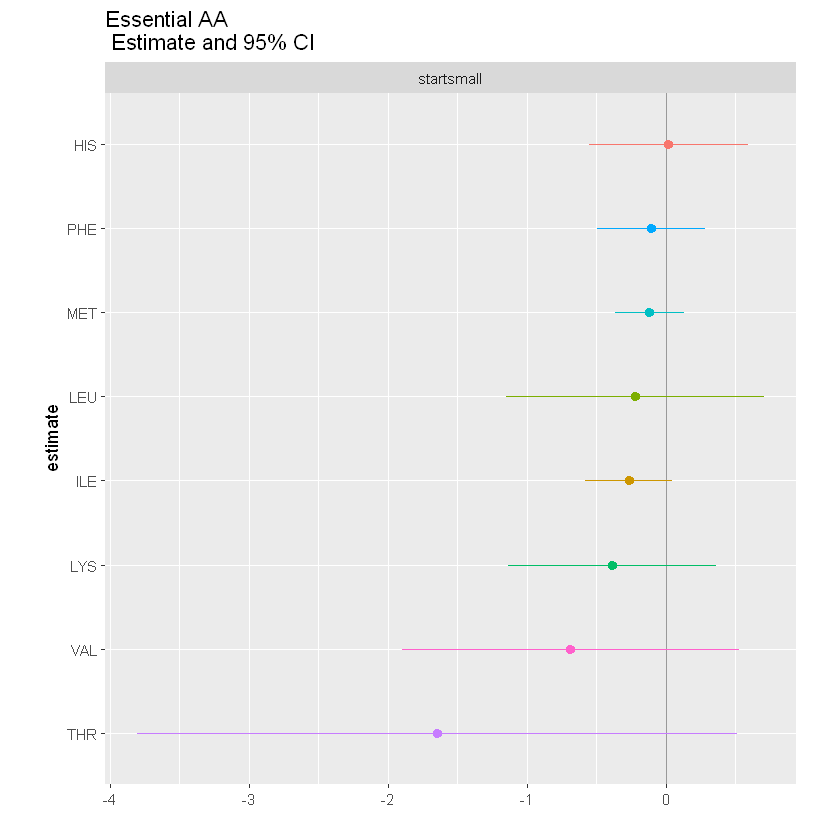

In [350]:
#png(filename="./plots/EAA_start_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(start_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab('') + xlab('estimate')
#dev.off()

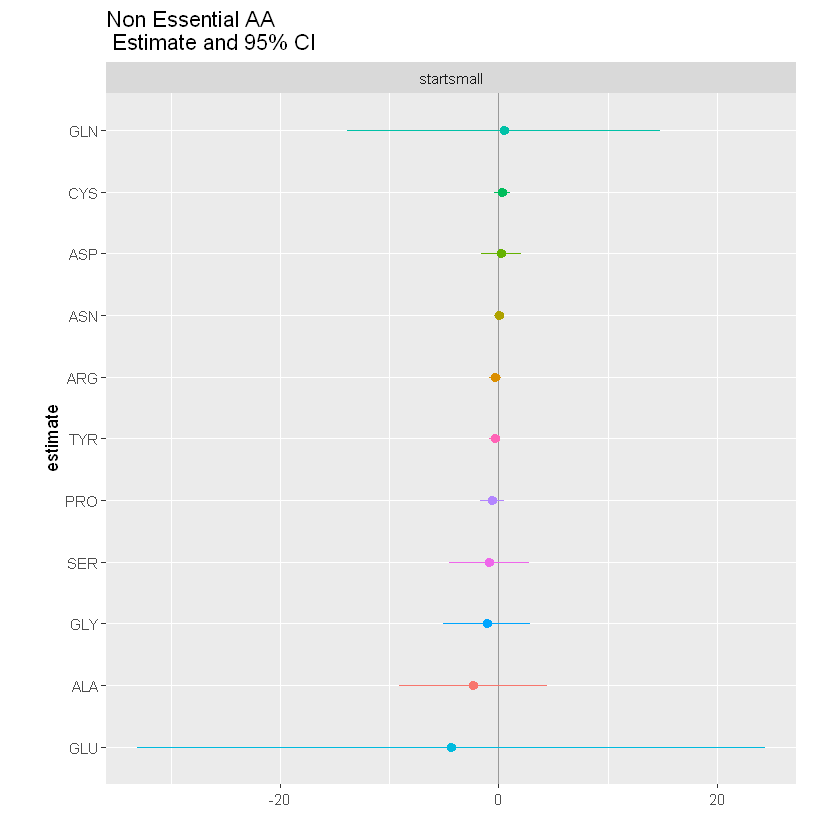

In [348]:
#png(filename="./plots/NEAA_start_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(start_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab('') + xlab('estimate')
#dev.off()